<b>Preprocessing<b>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path="gdrive/My Drive/Hackathon/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


<b>Preprocessing of raw_wheat.csv to wheat.csv<b>

In [0]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
#import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [0]:
daily_Data= pd.read_csv("gdrive/My Drive/Hackathon/raw_wheat.csv")

In [4]:
daily_Data.head(2)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal_Price,Price_Date
0,1,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,30 Apr 11
1,2,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,29 Apr 11


In [5]:
daily_Data.shape

(1999, 10)

In [0]:
df=daily_Data.copy()

In [7]:
df.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal_Price', 'Price_Date'],
      dtype='object')

In [0]:
df=df.rename(index=str, columns={"Sl no.": "Sl_no", "Min Price (Rs./Quintal)": "Min_Price","Price Date":"Price_Date","Modal Price (Rs./Quintal)":"Modal_Price"})

In [9]:
df.head()

,Sl_no,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max Price (Rs./Quintal),Modal_Price,Price_Date
0,1,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,30 Apr 11
1,2,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,29 Apr 11
2,3,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,29 Apr 10
3,4,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,28 Apr 10
4,5,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1120,1120,27 Apr 11


In [10]:
df.columns

Index(['Sl_no', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min_Price', 'Max Price (Rs./Quintal)', 'Modal_Price',
       'Price_Date'],
      dtype='object')

In [0]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')


In [12]:
df.head()

,Sl_no,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max Price (Rs./Quintal),Modal_Price,Price_Date
0,1,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,2011-04-30
1,2,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,2011-04-29
2,3,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-29
3,4,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-28
4,5,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1120,1120,2011-04-27


In [0]:
df=df.sort_values(by='Price_Date')

In [0]:
df.drop_duplicates('Price_Date', inplace = True)

In [15]:
df.head(20)

,Sl_no,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max Price (Rs./Quintal),Modal_Price,Price_Date
34,35,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-06
33,34,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-07
31,32,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-08
30,31,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-09
1644,1645,Bhatinda,Sangat,Wheat,Other,FAQ,1100,1100,1100,2010-04-10
962,963,Bhatinda,Rampura Phul,Wheat,Other,FAQ,1100,1100,1100,2010-04-11
960,961,Bhatinda,Rampura Phul,Wheat,Other,FAQ,1100,1100,1100,2010-04-12
1618,1619,Bhatinda,Sangat,Wheat,Other,FAQ,1100,1100,1100,2010-04-13
1064,1065,Bhatinda,Rampuraphul(Bhai Rupan),Wheat,Other,FAQ,1100,1100,1100,2010-04-14
1061,1062,Bhatinda,Rampuraphul(Bhai Rupan),Wheat,Other,FAQ,1100,1100,1100,2010-04-15


In [16]:
data=df.set_index('Price_Date')
data = data.copy()
y = data
# The 'MS' string groups the data in buckets by start of the month
y = y['Modal_Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)



Price_Date
2010-04-01    1100.0
2010-05-01    1100.0
2010-06-01    1110.0
2010-07-01    1100.0
2010-08-01    1700.0
               ...  
2017-01-01    1625.0
2017-02-01    1625.0
2017-03-01    1625.0
2017-04-01    1625.0
2017-05-01    1625.0
Freq: MS, Name: Modal_Price, Length: 86, dtype: float64


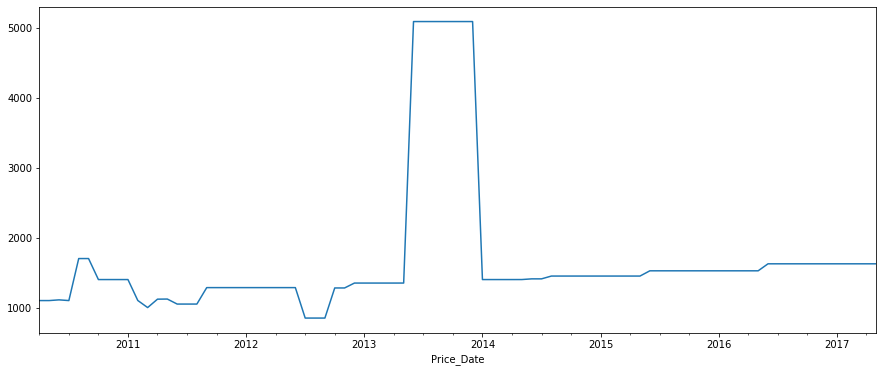

In [17]:
y.plot(figsize=(15, 6))
plt.show()

<b>Saving to wheat.csv for future price prediction<b>

In [0]:
chopdate='2014-01-01'
chopdate=datetime.strptime(chopdate,"%Y-%m-%d")
#print(chopdate)

In [19]:
mask=df['Price_Date']>chopdate

print(df.loc[mask])
df=df.loc[mask]
#print(df)

      Sl_no District Name  ... Modal_Price Price_Date
334     335      Bhatinda  ...        1400 2014-04-15
453     454      Bhatinda  ...        1400 2014-04-16
1919   1920      Bhatinda  ...        1400 2014-04-17
311     312      Bhatinda  ...        1400 2014-04-18
1562   1563      Bhatinda  ...        1400 2014-04-19
...     ...           ...  ...         ...        ...
1941   1942      Bhatinda  ...        1625 2017-05-06
1645   1646      Bhatinda  ...        1625 2017-05-09
963     964      Bhatinda  ...        1625 2017-05-10
1628   1629      Bhatinda  ...        1625 2017-05-11
1619   1620      Bhatinda  ...        1625 2017-05-12

[142 rows x 10 columns]


In [0]:
df.to_csv("gdrive/My Drive/Hackathon/new_wheat.csv", sep=',')